## Space Mission From 1957 Data Analysis

## What will we do in this project?
* Bivariate Analysis
* Sunburst and World Map Charts
* Comparison of Features
* Exploratory Data Analysis

## Introduction

* The Space Race was a 20th-century competition between two Cold War adversaries, the Soviet Union and the United States, to achieve superior spaceflight capability. 
* It had its origins in the ballistic missile-based nuclear arms race between the two nations following World War II.

## Analysis Content
1. [Python Libraries](#1)
1. [Data Content](#2)
1. [Read and Analysis Data](#3)
1. [Number of Launches](#4)
1. [Rocket Status](#5)
1. [Mission Status](#6)
1. [Rocket Cost Distribution with Rocket Status](#7)
1. [Rocket Cost Distribution with Mission Status](#8)
1. [Total Spend Money for Companies](#9)
1. [Mission Numbers by Year](#10)
1. [Countries and Mission Status](#11)
1. [Sunburst Chart Analysis](#12)
1. [](#13)


<a id=1></a>
## Python Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from iso3166 import countries
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

/kaggle/input/all-space-missions-from-1957/Space_Corrected.csv


<a id=2></a>
## Data Content

* **Company Name**: Company
* **Location:** Location of Launch
* **Datum:** Datum and Time of Launch
* **Detail:** Rocket Name
* **Status Rocket:** Status of the rocket
* **Rocket:** Cost of the mission in  million
* **Status Mission:** Status of the mission

<a id=3></a>
## Read and Analysis Data

In [2]:
df=pd.read_csv("/kaggle/input/all-space-missions-from-1957/Space_Corrected.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [3]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Company Name', 'Location', 'Datum',
       'Detail', 'Status Rocket', ' Rocket', 'Status Mission'],
      dtype='object')

In [4]:
df=df.drop(['Unnamed: 0', 'Unnamed: 0.1'],axis=1)
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [5]:
df.describe().T

,count,unique,top,freq
Company Name,4324,56,RVSN USSR,1777
Location,4324,137,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",235
Datum,4324,4319,"Wed Nov 05, 2008 00:15 UTC",2
Detail,4324,4278,Cosmos-3MRB (65MRB) | BOR-5 Shuttle,6
Status Rocket,4324,2,StatusRetired,3534
Rocket,964,56,450.0,136
Status Mission,4324,4,Success,3879


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company Name    4324 non-null   object
 1   Location        4324 non-null   object
 2   Datum           4324 non-null   object
 3   Detail          4324 non-null   object
 4   Status Rocket   4324 non-null   object
 5    Rocket         964 non-null    object
 6   Status Mission  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


<a id=4></a>
## Number of Launches by Each Company

In [7]:
df['Company Name'].value_counts()

RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ISA                   13
Rocket Lab            13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
MITT                   7
JAXA                   7
Land Launch            7
UT                     5
KCST                   5
CASIC                  5
Exos                   4
CECLES                 4
Arm??e de l'Air        4


In [8]:
ds=df['Company Name'].value_counts().reset_index()[:28]

In [9]:
fig=go.Figure(go.Bar(x=ds['index'],
                    y=ds['Company Name'],
                    marker=dict(color=ds['Company Name'],
                               colorscale='bluered')))
fig.update_layout(title= 'Number of Launches by Each Company',
                 xaxis_title='Top 28 Country', yaxis_title='count', hovermode='x')

<a id=5></a>
## Rocket Status

In [10]:
ds=df['Status Rocket'].value_counts().reset_index()
ds

,index,Status Rocket
0,StatusRetired,3534
1,StatusActive,790


In [11]:
fig=px.pie(ds,values='Status Rocket', names='index', title='Rocket Status')
fig.show()

<a id=6></a>
## Mission Status

In [12]:
ds=df['Status Mission'].value_counts().reset_index()
ds

,index,Status Mission
0,Success,3879
1,Failure,339
2,Partial Failure,102
3,Prelaunch Failure,4


In [13]:
fig=px.bar(ds, x='index', y='Status Mission', title='Mission Status')
fig.show()

<a id=7></a>
## Rocket Cost Distribution with Rocket Status

In [14]:
np.sum(pd.isna(df.loc[:," Rocket"]))

3360

In [15]:
df_=df.dropna(subset=[" Rocket"], axis="rows")
len(df_)

964

In [16]:
#we dropped null values
np.sum(pd.isna(df_.loc[:," Rocket"]))

0

In [17]:
df_.loc[:," Rocket"]
#dtatype is object. We should convert to float

0        50.0 
1       29.75 
3        65.0 
4       145.0 
5       64.68 
         ...  
3855     59.0 
3971    63.23 
3993    63.23 
4000    63.23 
4020    63.23 
Name:  Rocket, Length: 964, dtype: object

In [18]:
df_.loc[:, " Rocket"]=df_.loc[:," Rocket"].fillna(0.0).str.replace(",","")
df_.loc[:, " Rocket"]=df_.loc[:, " Rocket"].astype(np.float64).fillna(0.0)


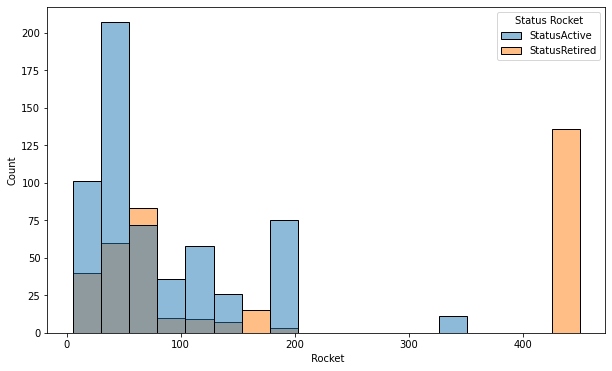

In [19]:
df_d=df_[df_.loc[:," Rocket"]<1000]
plt.figure(figsize=(10,6))
sns.histplot(data=df_d, x=" Rocket", hue="Status Rocket")
plt.show()

In [20]:
df_.loc[:," Rocket"]

0        50.00
1        29.75
3        65.00
4       145.00
5        64.68
         ...  
3855     59.00
3971     63.23
3993     63.23
4000     63.23
4020     63.23
Name:  Rocket, Length: 964, dtype: float64

<a id=8></a>
## Rocket Cost Distribution with Mission Status

In [21]:
np.sum(pd.isna(df.loc[:,"Status Mission"]))

0

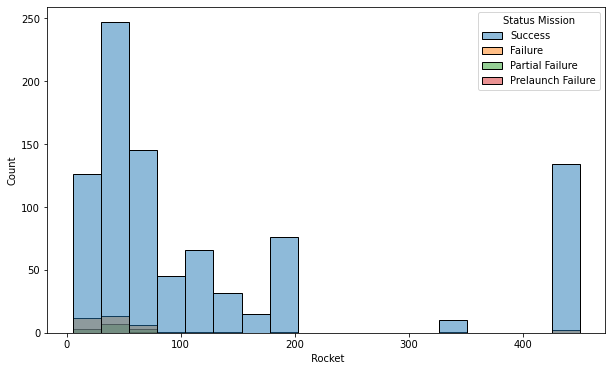

In [22]:

plt.figure(figsize=(10,6))
sns.histplot(data=df_d, x=" Rocket", hue="Status Mission")
plt.show()

<a id=9></a>
## Total Spend Money for Companies

In [23]:
df_.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success


In [24]:
df_.groupby(["Company Name"])[" Rocket"].sum()

Company Name
Arianespace        16345.00
Boeing              1241.00
CASC                6340.26
EER                   20.00
ESA                   37.00
Eurockot             543.40
ExPace                28.30
ILS                 1320.00
ISRO                2177.00
JAXA                 168.00
Kosmotras            638.00
Lockheed             280.00
MHI                 3532.50
Martin Marietta      721.40
NASA               76280.00
Northrop            3930.00
RVSN USSR          10000.00
Rocket Lab            97.50
Roscosmos           1187.50
Sandia                15.00
SpaceX              5444.00
ULA                14798.00
US Air Force        1550.92
VKS RF              1548.90
Virgin Orbit          12.00
Name:  Rocket, dtype: float64

In [25]:
df_money=df_.groupby(["Company Name"])[" Rocket"].sum().reset_index()
df_money=df_money[df_money[" Rocket"]>0]
df_money.head()

,Company Name,Rocket
0,Arianespace,16345.00
1,Boeing,1241.00
2,CASC,6340.26
3,EER,20.00
4,ESA,37.00


In [26]:
df_money_=df_money.sort_values(by=[" Rocket"],ascending=False)[:15]
df_money_.head()

,Company Name,Rocket
14,NASA,76280.00
0,Arianespace,16345.00
21,ULA,14798.00
16,RVSN USSR,10000.00
2,CASC,6340.26


In [27]:
fig=px.bar(df_money_,x="Company Name", y=" Rocket", title="Total Spend Money for Each Company")
fig.show()

<a id=10></a>
## Mission Numbers by Year

In [28]:
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [29]:
df["date"]=pd.to_datetime(df["Datum"])
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,date
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00


In [30]:
df["year"]=df["date"].apply(lambda datetime:datetime.year)
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,date,year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020


In [31]:
ds=df["year"].value_counts().reset_index()
ds

,index,year
0,1971,119
1,2018,117
2,1977,114
3,1975,113
4,1976,113
...,...,...
59,2010,37
60,2005,37
61,1958,28
62,1959,20


In [32]:
fig=px.bar(ds,x="index", y="year", title="Missions Number by Year")
fig.show()

<a id=11></a>
## Countries and Mission Status

In [33]:
df["Status Mission"]

0       Success
1       Success
2       Success
3       Success
4       Success
         ...   
4319    Failure
4320    Success
4321    Failure
4322    Success
4323    Success
Name: Status Mission, Length: 4324, dtype: object

In [34]:
#we will encode this feature
encoder=LabelEncoder()
encoder.fit(df["Status Mission"])
encoder

LabelEncoder()

In [35]:
colors={0 : "red",
        1 : "Orange",
        2 : "Yellow",
        3 : "Green"}
colors

{0: 'red', 1: 'Orange', 2: 'Yellow', 3: 'Green'}

In [36]:
countries_dict={
    'Russia' : 'Russian Federation',
    'New Mexico' : 'USA',
    'Yellow Sea' : 'China',
    'Shahrud Missile Test Site' : 'Iran',
    'Pacific Missile Range Facility' : 'USA',
    'Barents Sea' : 'Russian Federation',
    'Gran Canaria' : 'USA'
    
    
}
df['country']=df['Location'].str.split(", ").str[-1].replace(countries_dict)

In [37]:
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,date,year,country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020,USA


In [38]:
fig=make_subplots(rows=4, cols=4, subplot_titles=df['country'].unique())
for i, country in enumerate(df['country'].unique()):
    counts=df[df['country']==country]['Status Mission'].value_counts(normalize=True)*100
    color=[colors[x] for x in encoder.transform(counts.index)]
    trace=go.Bar(x=counts.index, y=counts.values, name=country, marker={'color':color}, showlegend=False)
    fig.add_trace(trace,row=(i//4)+1, col=(i%4)+1)
fig.update_layout(title={'text':'Countries and Mission Status'},height=1000, width=1100)
for i in range(1,5):
    fig.update_yaxes(title_text='Percentage', row=i, col=1)
fig.show()

<a id=12></a>
## Sunburst Chart Analysis

In [39]:
sun=df.groupby(["country","Company Name", "Status Mission"])['Datum'].count().reset_index()
sun.head()

,country,Company Name,Status Mission,Datum
0,Australia,AMBA,Success,1
1,Australia,CECLES,Failure,2
2,Australia,CECLES,Success,1
3,Australia,RAE,Failure,1
4,Australia,RAE,Success,1


In [40]:
sun=sun[(sun.country=='USA') | (sun.country=='China') | (sun.country=='Russian Federation') | (sun.country=='France')]
sun.head()

,country,Company Name,Status Mission,Datum
7,China,CASC,Failure,14
8,China,CASC,Partial Failure,6
9,China,CASC,Success,231
10,China,CASIC,Failure,2
11,China,CASIC,Success,3


In [41]:
fig=px.sunburst(sun,path=['country','Company Name', 'Status Mission'], values='Datum', title='sunburst chart for some countries')
fig.show()